In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
df = yf.download("005930.KS", start = "2025-01-01") #삼성 전자 주가의 변동성 분석

C:\Users\hyyyy\AppData\Local\Temp\ipykernel_7164\1714373603.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("005930.KS", start = "2025-01-01") #삼성 전자 주가의 변동성 분석
[*********************100%***********************]  1 of 1 completed


In [2]:
df.index = pd.to_datetime(df.index) #date인덱스 string -> datatime

In [3]:
df['return'] = df['Close'].pct_change() #일일 수익률 계산

In [4]:
df.dropna(inplace=True) #2025-01-02 row를 삭제

In [5]:
df.isna().sum() #결측치 없음을 확인

Price   Ticker   
Close   005930.KS    0
High    005930.KS    0
Low     005930.KS    0
Open    005930.KS    0
Volume  005930.KS    0
return               0
dtype: int64

In [10]:
df_sorted = df.sort_values(by='return', ascending=False)

In [11]:
df_sorted.head(3)

Price,Close,High,Low,Open,Volume,return
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,
Date,,,,,,
2025-07-28,70087.296875,70087.296875,66901.510653,67897.068848,35332500,0.068285
2025-04-10,55807.175781,56104.022461,54421.891276,56005.073568,22948172,0.064151
2025-03-17,56657.941406,56854.670369,54493.922811,54592.287292,35559021,0.053016


In [12]:
df_sorted.tail(3)

Price,Close,High,Low,Open,Volume,return
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,
Date,,,,,,
2025-11-14,97200.0,99600.0,97200.0,99000.0,21806342,-0.054475
2025-11-04,104900.0,112400.0,104900.0,111800.0,30450281,-0.055806
2025-11-21,94800.0,96800.0,94500.0,95600.0,23103574,-0.057654


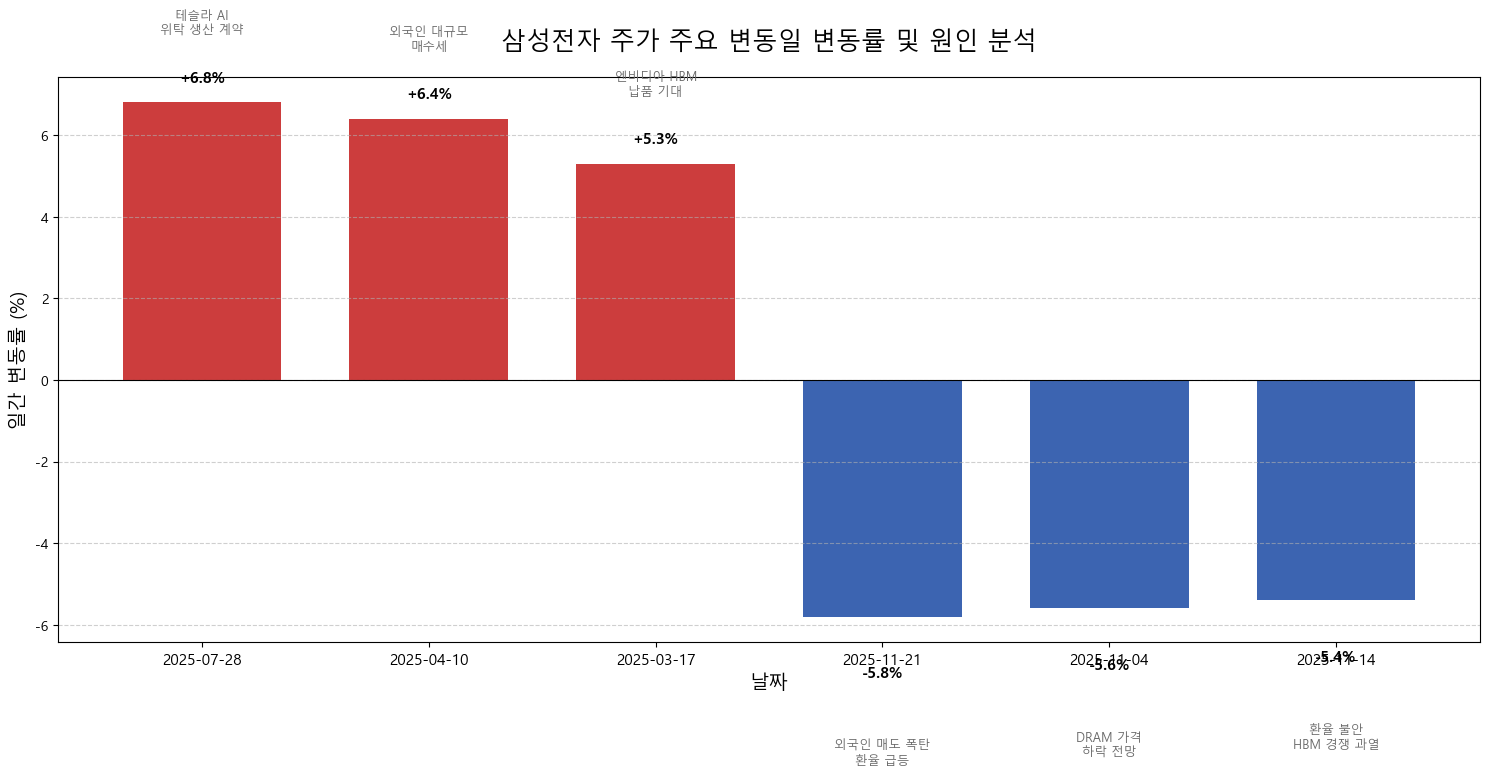

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

data = {
    '날짜': ['2025-07-28', '2025-04-10', '2025-03-17', '2025-11-21', '2025-11-04', '2025-11-14'],
    '변동률': [0.068, 0.064, 0.053, -0.058, -0.056, -0.054],  
    '원인': [
        '테슬라 AI 위탁 생산 계약',
        '외국인 대규모 매수세',
        '엔비디아 HBM 납품 기대',
        '외국인 매도 폭탄 & 환율 급등',
        'DRAM 가격 하락 전망',
        '환율 불안 & HBM 경쟁 과열'
    ]
}
df_events = pd.DataFrame(data)


plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(15, 8)) 

y_values = df_events['변동률'] * 100 
bars = plt.bar(
    df_events['날짜'],
    y_values,
    color=['#CC3D3D' if r > 0 else '#3C64B1' for r in df_events['변동률']],
    width=0.7
)

plt.title('삼성전자 주가 주요 변동일 변동률 및 원인 분석', fontsize=18, pad=20)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('일간 변동률 (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.axhline(0, color='black', linewidth=0.8) 
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

for i, bar in enumerate(bars):
    height = bar.get_height() 
    center_x = bar.get_x() + bar.get_width() / 2 

    plt.text(
        center_x, 
        height + (0.4 if height > 0 else -1.2), 
        f'{height:+.1f}%', 
        ha='center', 
        va='bottom' if height > 0 else 'top',
        fontsize=11, 
        fontweight='bold',
        color='black'
    )

    cause = df_events['원인'][i]
    if ' & ' in cause:
        cause_text = cause.replace(' & ', '\n') 
    elif len(cause) > 10:
        parts = cause.split(' ')
        if len(parts) >= 3:
            cause_text = f"{' '.join(parts[:2])}\n{' '.join(parts[2:])}"
        else:
            cause_text = cause.replace(' ', '\n', 1) 
    else:
        cause_text = cause

    
    plt.text(
        center_x, 
        height + (1.6 if height > 0 else -3.0), 
        cause_text,
        ha='center', 
        va='bottom' if height > 0 else 'top',
        fontsize=9,
        color='dimgray'
    )

plt.tight_layout()
plt.show()